## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_LQD
data_LQD.head(2)

,Adj Close
Date,
2009-06-01,65.979172
2009-06-08,67.205452


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a45707f98>],
      dtype=object)

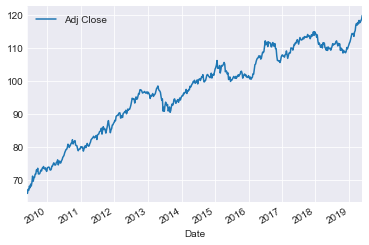

In [3]:
data_LQD.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_LQD)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.       ],
       [0.0227934]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [14]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

Epoch 1/2000
311/311 [==============================] - 2s 6ms/step - loss: 0.1859
Epoch 2/2000
311/311 [==============================] - 0s 176us/step - loss: 0.1514
Epoch 3/2000
311/311 [==============================] - 0s 178us/step - loss: 0.1208
Epoch 4/2000
311/311 [==============================] - 0s 173us/step - loss: 0.0936
Epoch 5/2000
311/311 [==============================] - 0s 182us/step - loss: 0.0700
Epoch 6/2000
311/311 [==============================] - 0s 181us/step - loss: 0.0504
Epoch 7/2000
311/311 [==============================] - 0s 173us/step - loss: 0.0352
Epoch 8/2000
311/311 [==============================] - 0s 177us/step - loss: 0.0245
Epoch 9/2000
311/311 [==============================] - 0s 171us/step - loss: 0.0181
Epoch 10/2000
311/311 [==============================] - 0s 174us/step - loss: 0.0151
Epoch 11/2000
311/311 [==============================] - 0s 175us/step - loss: 0.0143
Epoch 12/2000
311/311 [==============================] - 0s 177us

311/311 [==============================] - 0s 166us/step - loss: 2.1665e-04
Epoch 186/2000
311/311 [==============================] - 0s 168us/step - loss: 2.1662e-04
Epoch 187/2000
311/311 [==============================] - 0s 160us/step - loss: 2.1660e-04
Epoch 188/2000
311/311 [==============================] - 0s 159us/step - loss: 2.1657e-04
Epoch 189/2000
311/311 [==============================] - 0s 155us/step - loss: 2.1654e-04
Epoch 190/2000
311/311 [==============================] - 0s 154us/step - loss: 2.1652e-04
Epoch 191/2000
311/311 [==============================] - 0s 158us/step - loss: 2.1649e-04
Epoch 192/2000
311/311 [==============================] - 0s 181us/step - loss: 2.1646e-04
Epoch 193/2000
311/311 [==============================] - 0s 177us/step - loss: 2.1644e-04
Epoch 194/2000
311/311 [==============================] - 0s 161us/step - loss: 2.1641e-04
Epoch 195/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1638e-04
Epoch 196/2000

311/311 [==============================] - 0s 162us/step - loss: 2.1058e-04
Epoch 366/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1054e-04
Epoch 367/2000
311/311 [==============================] - 0s 155us/step - loss: 2.1050e-04
Epoch 368/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1046e-04
Epoch 369/2000
311/311 [==============================] - 0s 155us/step - loss: 2.1042e-04
Epoch 370/2000
311/311 [==============================] - 0s 154us/step - loss: 2.1038e-04
Epoch 371/2000
311/311 [==============================] - 0s 156us/step - loss: 2.1034e-04
Epoch 372/2000
311/311 [==============================] - 0s 153us/step - loss: 2.1030e-04
Epoch 373/2000
311/311 [==============================] - 0s 154us/step - loss: 2.1026e-04
Epoch 374/2000
311/311 [==============================] - 0s 170us/step - loss: 2.1022e-04
Epoch 375/2000
311/311 [==============================] - 0s 177us/step - loss: 2.1018e-04
Epoch 376/2000

311/311 [==============================] - 0s 184us/step - loss: 2.0326e-04
Epoch 546/2000
311/311 [==============================] - 0s 187us/step - loss: 2.0322e-04
Epoch 547/2000
311/311 [==============================] - 0s 176us/step - loss: 2.0319e-04
Epoch 548/2000
311/311 [==============================] - 0s 175us/step - loss: 2.0315e-04
Epoch 549/2000
311/311 [==============================] - 0s 181us/step - loss: 2.0311e-04
Epoch 550/2000
311/311 [==============================] - 0s 184us/step - loss: 2.0308e-04
Epoch 551/2000
311/311 [==============================] - 0s 187us/step - loss: 2.0304e-04
Epoch 552/2000
311/311 [==============================] - 0s 187us/step - loss: 2.0301e-04
Epoch 553/2000
311/311 [==============================] - 0s 186us/step - loss: 2.0297e-04
Epoch 554/2000
311/311 [==============================] - 0s 192us/step - loss: 2.0293e-04
Epoch 555/2000
311/311 [==============================] - 0s 252us/step - loss: 2.0290e-04
Epoch 556/2000

311/311 [==============================] - 0s 228us/step - loss: 1.9907e-04
Epoch 726/2000
311/311 [==============================] - 0s 234us/step - loss: 1.9906e-04
Epoch 727/2000
311/311 [==============================] - 0s 220us/step - loss: 1.9905e-04
Epoch 728/2000
311/311 [==============================] - 0s 202us/step - loss: 1.9904e-04
Epoch 729/2000
311/311 [==============================] - 0s 205us/step - loss: 1.9903e-04
Epoch 730/2000
311/311 [==============================] - 0s 205us/step - loss: 1.9903e-04
Epoch 731/2000
311/311 [==============================] - 0s 214us/step - loss: 1.9902e-04
Epoch 732/2000
311/311 [==============================] - 0s 207us/step - loss: 1.9901e-04
Epoch 733/2000
311/311 [==============================] - 0s 205us/step - loss: 1.9900e-04
Epoch 734/2000
311/311 [==============================] - 0s 203us/step - loss: 1.9900e-04
Epoch 735/2000
311/311 [==============================] - 0s 201us/step - loss: 1.9899e-04
Epoch 736/2000

311/311 [==============================] - 0s 204us/step - loss: 1.9899e-04
Epoch 906/2000
311/311 [==============================] - 0s 214us/step - loss: 1.9899e-04
Epoch 907/2000
311/311 [==============================] - 0s 212us/step - loss: 1.9899e-04
Epoch 908/2000
311/311 [==============================] - 0s 214us/step - loss: 1.9900e-04
Epoch 909/2000
311/311 [==============================] - 0s 206us/step - loss: 1.9900e-04
Epoch 910/2000
311/311 [==============================] - 0s 211us/step - loss: 1.9900e-04
Epoch 911/2000
311/311 [==============================] - 0s 212us/step - loss: 1.9901e-04
Epoch 912/2000
311/311 [==============================] - 0s 219us/step - loss: 1.9901e-04
Epoch 913/2000
311/311 [==============================] - 0s 219us/step - loss: 1.9901e-04
Epoch 914/2000
311/311 [==============================] - 0s 218us/step - loss: 1.9901e-04
Epoch 915/2000
311/311 [==============================] - 0s 213us/step - loss: 1.9902e-04
Epoch 916/2000

311/311 [==============================] - 0s 200us/step - loss: 1.9905e-04
Epoch 1085/2000
311/311 [==============================] - 0s 205us/step - loss: 1.9906e-04
Epoch 1086/2000
311/311 [==============================] - 0s 203us/step - loss: 1.9906e-04
Epoch 1087/2000
311/311 [==============================] - 0s 200us/step - loss: 1.9906e-04
Epoch 1088/2000
311/311 [==============================] - 0s 203us/step - loss: 1.9906e-04
Epoch 1089/2000
311/311 [==============================] - 0s 202us/step - loss: 1.9907e-04
Epoch 1090/2000
311/311 [==============================] - 0s 220us/step - loss: 1.9907e-04
Epoch 1091/2000
311/311 [==============================] - 0s 236us/step - loss: 1.9907e-04
Epoch 1092/2000
311/311 [==============================] - 0s 228us/step - loss: 1.9907e-04
Epoch 1093/2000
311/311 [==============================] - 0s 219us/step - loss: 1.9908e-04
Epoch 1094/2000
311/311 [==============================] - 0s 214us/step - loss: 1.9908e-04
Epoc

311/311 [==============================] - 0s 239us/step - loss: 1.9906e-04
Epoch 1263/2000
311/311 [==============================] - 0s 241us/step - loss: 1.9906e-04
Epoch 1264/2000
311/311 [==============================] - 0s 223us/step - loss: 1.9906e-04
Epoch 1265/2000
311/311 [==============================] - 0s 253us/step - loss: 1.9907e-04
Epoch 1266/2000
311/311 [==============================] - 0s 241us/step - loss: 1.9907e-04
Epoch 1267/2000
311/311 [==============================] - 0s 244us/step - loss: 1.9907e-04
Epoch 1268/2000
311/311 [==============================] - 0s 246us/step - loss: 1.9907e-04
Epoch 1269/2000
311/311 [==============================] - 0s 238us/step - loss: 1.9908e-04
Epoch 1270/2000
311/311 [==============================] - 0s 243us/step - loss: 1.9908e-04
Epoch 1271/2000
311/311 [==============================] - 0s 266us/step - loss: 1.9908e-04
Epoch 1272/2000
311/311 [==============================] - 0s 269us/step - loss: 1.9908e-04
Epoc

311/311 [==============================] - 0s 213us/step - loss: 1.9908e-04
Epoch 1441/2000
311/311 [==============================] - 0s 206us/step - loss: 1.9908e-04
Epoch 1442/2000
311/311 [==============================] - 0s 208us/step - loss: 1.9908e-04
Epoch 1443/2000
311/311 [==============================] - 0s 206us/step - loss: 1.9908e-04
Epoch 1444/2000
311/311 [==============================] - 0s 196us/step - loss: 1.9909e-04
Epoch 1445/2000
311/311 [==============================] - 0s 206us/step - loss: 1.9909e-04
Epoch 1446/2000
311/311 [==============================] - 0s 208us/step - loss: 1.9909e-04
Epoch 1447/2000
311/311 [==============================] - 0s 217us/step - loss: 1.9909e-04
Epoch 1448/2000
311/311 [==============================] - 0s 216us/step - loss: 1.9910e-04
Epoch 1449/2000
311/311 [==============================] - 0s 219us/step - loss: 1.9910e-04
Epoch 1450/2000
311/311 [==============================] - 0s 263us/step - loss: 1.9910e-04
Epoc

311/311 [==============================] - 0s 228us/step - loss: 1.9909e-04
Epoch 1618/2000
311/311 [==============================] - 0s 232us/step - loss: 1.9909e-04
Epoch 1619/2000
311/311 [==============================] - 0s 222us/step - loss: 1.9910e-04
Epoch 1620/2000
311/311 [==============================] - 0s 216us/step - loss: 1.9910e-04
Epoch 1621/2000
311/311 [==============================] - 0s 224us/step - loss: 1.9910e-04
Epoch 1622/2000
311/311 [==============================] - 0s 219us/step - loss: 1.9910e-04
Epoch 1623/2000
311/311 [==============================] - 0s 266us/step - loss: 1.9911e-04
Epoch 1624/2000
311/311 [==============================] - 0s 279us/step - loss: 1.9911e-04
Epoch 1625/2000
311/311 [==============================] - 0s 234us/step - loss: 1.9911e-04
Epoch 1626/2000
311/311 [==============================] - 0s 229us/step - loss: 1.9911e-04
Epoch 1627/2000
311/311 [==============================] - 0s 207us/step - loss: 1.9912e-04
Epoc

311/311 [==============================] - 0s 227us/step - loss: 1.9912e-04
Epoch 1796/2000
311/311 [==============================] - 0s 218us/step - loss: 1.9912e-04
Epoch 1797/2000
311/311 [==============================] - 0s 214us/step - loss: 1.9912e-04
Epoch 1798/2000
311/311 [==============================] - 0s 208us/step - loss: 1.9912e-04
Epoch 1799/2000
311/311 [==============================] - 0s 213us/step - loss: 1.9913e-04
Epoch 1800/2000
311/311 [==============================] - 0s 213us/step - loss: 1.9914e-04
Epoch 1801/2000
311/311 [==============================] - 0s 212us/step - loss: 1.9913e-04
Epoch 1802/2000
311/311 [==============================] - 0s 217us/step - loss: 1.9912e-04
Epoch 1803/2000
311/311 [==============================] - 0s 208us/step - loss: 1.9914e-04
Epoch 1804/2000
311/311 [==============================] - 0s 216us/step - loss: 1.9915e-04
Epoch 1805/2000
311/311 [==============================] - 0s 211us/step - loss: 1.9915e-04
Epoc

311/311 [==============================] - 0s 177us/step - loss: 1.9913e-04
Epoch 1974/2000
311/311 [==============================] - 0s 180us/step - loss: 1.9913e-04
Epoch 1975/2000
311/311 [==============================] - 0s 182us/step - loss: 1.9916e-04
Epoch 1976/2000
311/311 [==============================] - 0s 164us/step - loss: 1.9918e-04
Epoch 1977/2000
311/311 [==============================] - 0s 155us/step - loss: 1.9916e-04
Epoch 1978/2000
311/311 [==============================] - 0s 163us/step - loss: 1.9913e-04
Epoch 1979/2000
311/311 [==============================] - 0s 178us/step - loss: 1.9914e-04
Epoch 1980/2000
311/311 [==============================] - 0s 178us/step - loss: 1.9919e-04
Epoch 1981/2000
311/311 [==============================] - 0s 176us/step - loss: 1.9922e-04
Epoch 1982/2000
311/311 [==============================] - 0s 179us/step - loss: 1.9917e-04
Epoch 1983/2000
311/311 [==============================] - 0s 185us/step - loss: 1.9910e-04
Epoc

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [15]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.77 RMSE
Testing score: 0.73 RMSE


### Plotting and comparing original data, predictions, forecasts

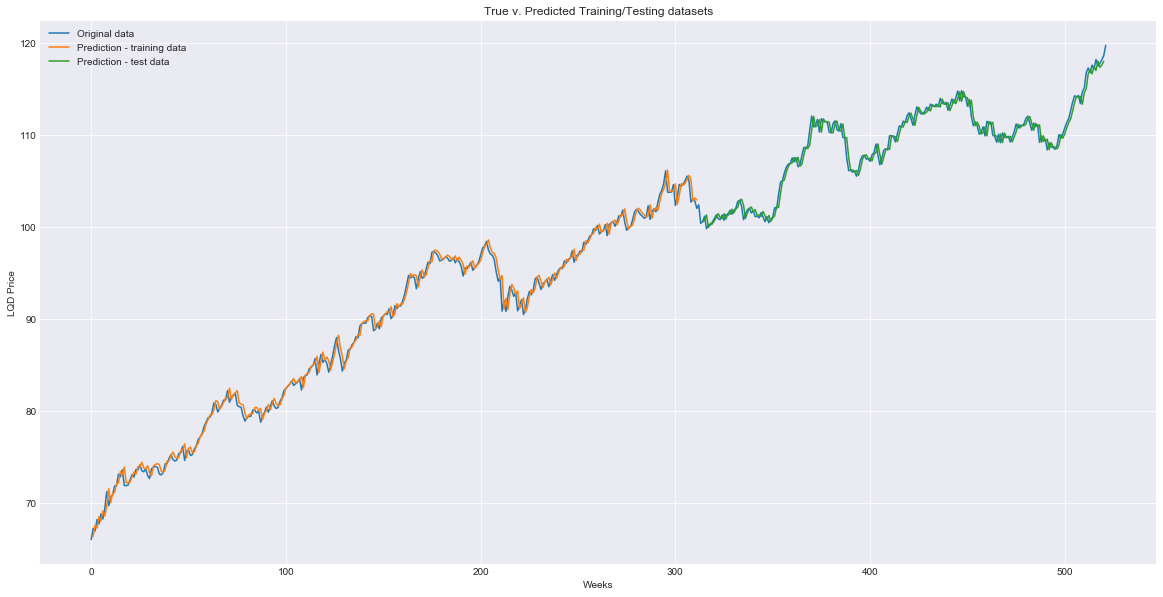

In [16]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('LQD Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [17]:
LSTM_pred_LQD = pd.DataFrame(test_pred)
%store LSTM_pred_LQD

Stored 'LSTM_pred_LQD' (DataFrame)
